# Marina Selber Cekannauskas

## Research question/interest

The dataset provides an insight on the concept of masculinity through the lens 
of the modern men . As a female student in DataScience - a male dominant field-
I would like to analyse questions such as how important it is for men to be seen by outsiders as  masculine,  what are some of the insights on  what  they considered advantages and disadvantages of being a men in the job market and if there is any relationship between 
their need for being seen  masculine with attitudes in the working environment .


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv")
df

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,1611,5/22/18 8:48,5/22/18 8:52,Not very masculine,Not at all important,Father or father figure(s),Mother or mother figure(s),Other family members,Pop culture,Friends,...,West North Central,iOS Phone / Tablet,White,White,Some college,Some college,18 - 34,No children,Straight,2.891038
1611,1612,5/22/18 9:15,5/22/18 9:24,Very masculine,Very important,Father or father figure(s),Not selected,Other family members,Not selected,Not selected,...,NaN,iOS Phone / Tablet,Non-white,Hispanic,High school or less,High school or less,35 - 64,Has children,Straight,8.643674
1612,1613,5/22/18 9:22,5/22/18 9:39,Somewhat masculine,Somewhat important,Not selected,Mother or mother figure(s),Not selected,Not selected,Not selected,...,South Atlantic,Windows Desktop / Laptop,White,White,Some college,Some college,35 - 64,Has children,Straight,2.340241
1613,1614,5/22/18 9:44,5/22/18 9:50,Somewhat masculine,Somewhat important,Not selected,Mother or mother figure(s),Not selected,Not selected,Not selected,...,Mountain,Windows Desktop / Laptop,White,White,High school or less,High school or less,18 - 34,No children,Straight,6.557984


# Task 1 : EDA 

In [5]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

print("Number of rows and columns respectively:", df.shape)


Number of rows and columns respectively: (1615, 98)


#### Based on the frequency table below  , it is possible to understand most common answers for survey questions as well as demographic categories  

In [6]:
df.describe(include='object').T

,count,unique,top,freq
StartDate,1615,1378,5/21/18 12:36,4
EndDate,1615,1377,5/17/18 4:41,4
q0001,1615,5,Somewhat masculine,826
q0002,1615,5,Somewhat important,628
q0004_0001,1615,2,Father or father figure(s),1109
...,...,...,...,...
educ3,1615,3,College or more,997
educ4,1615,4,College or more,515
age3,1615,3,35 - 64,855
kids,1606,2,Has children,1065


#### Our survey is based mostly on categorical variables. The numerical variable "weight" is the only varible that allows for an overview of data with an approach in statistics .

In [97]:
df.dtypes

Unnamed: 0       int64
StartDate       object
EndDate         object
q0001           object
q0002           object
                ...   
educ4           object
age3            object
kids            object
orientation     object
weight         float64
Length: 98, dtype: object

In [98]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
weight,1615.0,1.0,1.438996,0.019744,0.10258,0.596892,1.010046,8.676606


#### Before cleaning the data , I wanted to understand the meaning for the  first four columns : how long it took for each participant to answer each question . Note on dropping the "Unnamed" column since it is unnecessary 

In [99]:
df[df.columns[0:3]]

,Unnamed: 0,StartDate,EndDate
0,1,5/10/18 4:01,5/10/18 4:06
1,2,5/10/18 6:30,5/10/18 6:53
2,3,5/10/18 7:02,5/10/18 7:09
3,4,5/10/18 7:27,5/10/18 7:31
4,5,5/10/18 7:35,5/10/18 7:42
...,...,...,...
1610,1611,5/22/18 8:48,5/22/18 8:52
1611,1612,5/22/18 9:15,5/22/18 9:24
1612,1613,5/22/18 9:22,5/22/18 9:39
1613,1614,5/22/18 9:44,5/22/18 9:50


 Analyzing the columns I realized questions on the survey were substituted with "q00x" , it would be possible to rename columns . However , in this survey some questions ( such as question 4 and question 8 for example ) had multiple answers . When loading the table , some columns were created to fit such options . Therefore , q004_001, q0004_0002,q0004_0003,q0004_0004 are all part of question 4 for example.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 98 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1615 non-null   int64  
 1   StartDate    1615 non-null   object 
 2   EndDate      1615 non-null   object 
 3   q0001        1615 non-null   object 
 4   q0002        1615 non-null   object 
 5   q0004_0001   1615 non-null   object 
 6   q0004_0002   1615 non-null   object 
 7   q0004_0003   1615 non-null   object 
 8   q0004_0004   1615 non-null   object 
 9   q0004_0005   1615 non-null   object 
 10  q0004_0006   1615 non-null   object 
 11  q0005        1615 non-null   object 
 12  q0007_0001   1615 non-null   object 
 13  q0007_0002   1615 non-null   object 
 14  q0007_0003   1615 non-null   object 
 15  q0007_0004   1615 non-null   object 
 16  q0007_0005   1615 non-null   object 
 17  q0007_0006   1615 non-null   object 
 18  q0007_0007   1615 non-null   object 
 19  q0007_

In [101]:
df['q0001'].value_counts()

Somewhat masculine      826
Very masculine          612
Not very masculine      131
Not at all masculine     32
No answer                14
Name: q0001, dtype: int64

In [102]:
df['q0011_0001'].value_counts()

Not selected                               700
Managers want to hire and promote women    180
Name: q0011_0001, dtype: int64

In [8]:
print(df.isnull().values.sum())

20455


# Task 2 - 3

My goal is to analyse a possible relationship between the importance of being seen as masculine with behavior in the workplace . Firstly , how important is it for men to be seen as masculine ?  Secondly, what are considered to be the advantages of being a men in the workplace ? The disadvantages ? Finally,  is there any relationship between men who highly value being seen as masculine with recognizing possible advantanges of being a men ? Is there any relationship between the perception on masculinity with their opinions on possible disadvantages?  
 

#### First , I selected the columns I wanted to answer such question and dropped the others 
**Question 10** :  In which of the following ways would you say it’s an ​advantage​ to be a man at
your work right now? 
- q0010_0001 : Men make more money 
- q0010_0002 : Men are taken more serioulsy 
- q0010_0003 : Men have more choice 
- q00010_0004: Men have more promotion/professional development opportunities 
- q00010_0005: Men are explicitly praised more often
- q00010_0004: Men generally have more support from their managers
- q00010_0004:Other (please specify)
- q00010_0004:None of the above

In [18]:
DF = df[['q0002','q0010_0001','q0010_0002','q0010_0003','q0010_0004','q0010_0005','q0010_0006','q0010_0007','q0010_0008']]
DF                                                           

,q0002,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008
0,Somewhat important,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Somewhat important,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Not too important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
3,Not too important,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Very important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
...,...,...,...,...,...,...,...,...,...
1610,Not at all important,Men make more money,Men are taken more seriously,Men have more choice,Men have more promotion/professional developme...,Men are explicitly praised more often,Men generally have more support from their man...,Not selected,Not selected
1611,Very important,Men make more money,Not selected,Men have more choice,Not selected,Not selected,Men generally have more support from their man...,Not selected,Not selected
1612,Somewhat important,Men make more money,Men are taken more seriously,Not selected,Men have more promotion/professional developme...,Not selected,Not selected,Not selected,Not selected
1613,Somewhat important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected


In [11]:
print(DF.isnull().values.sum())

5880


#### Second , considering participants who were unemployed/ retired in the survey and  ,therefore , are not relevant to the question of workplace behavior ,  I dropped all Nan values 

In [19]:
Dataframe = DF.dropna()
Dataframe

,q0002,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008
2,Not too important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
4,Very important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
5,Somewhat important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify)
6,Not too important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
8,Not at all important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
...,...,...,...,...,...,...,...,...,...
1609,Not at all important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify)
1610,Not at all important,Men make more money,Men are taken more seriously,Men have more choice,Men have more promotion/professional developme...,Men are explicitly praised more often,Men generally have more support from their man...,Not selected,Not selected
1611,Very important,Men make more money,Not selected,Men have more choice,Not selected,Not selected,Men generally have more support from their man...,Not selected,Not selected
1612,Somewhat important,Men make more money,Men are taken more seriously,Not selected,Men have more promotion/professional developme...,Not selected,Not selected,Not selected,Not selected


In [14]:
print(Dataframe.isnull().values.sum())

0


#### I renamed column 2 ( along with all others )  with the question itself as well as  I changed categorical answers for second column into numerical ones .
#### If being masculine is "very important" it would reach a value of 4 while "not important at all" would be the value of 1.

In [20]:
Dataframe = Dataframe.rename(columns={"q0002": "Importance of being seen as masculine" , "q0010_0001": "Men make more money" , "q0010_0002": "Men are taken more seriously" , "q0010_0003": "Men have more choice","q0010_0004": "Men have more promotion/professional development opportunities","q0010_0005": "Men are explicitly praised more often", "q0010_0006":"Men have more support from their managers","q0010_0007":"Other" , "q0010_0008":"None of the Above"})
Dataframe.head()

,Importance of being seen as masculine,Men make more money,Men are taken more seriously,Men have more choice,Men have more promotion/professional development opportunities,Men are explicitly praised more often,Men have more support from their managers,Other,None of the Above
2,Not too important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
4,Very important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
5,Somewhat important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify)
6,Not too important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
8,Not at all important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected


In [21]:
Dataframe = Dataframe.select_dtypes(include=['object']).copy()
cleanup_nums = {"Importance of being seen as masculine" : {"Very important": 4, "Somewhat important":3 , "Not too important":2, "Not at all important":1 , "No answer":0}}
Dataframe = Dataframe.replace(cleanup_nums)
Dataframe.head() 

,Importance of being seen as masculine,Men make more money,Men are taken more seriously,Men have more choice,Men have more promotion/professional development opportunities,Men are explicitly praised more often,Men have more support from their managers,Other,None of the Above
2,2,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
4,4,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
5,3,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify)
6,2,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
8,1,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected


In [60]:
MasculinityImportance = Dataframe.groupby(["Importance of being seen as masculine"]).size().reset_index(name="count")
MasculinityImportance

,Importance of being seen as masculine,count
0,0,3
1,1,123
2,2,292
3,3,356
4,4,106


<AxesSubplot:xlabel='Importance of being seen as masculine', ylabel='count'>

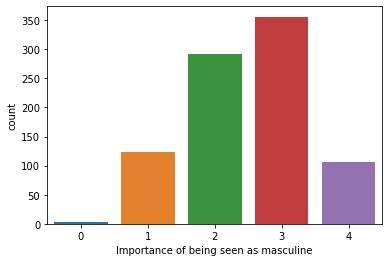

In [61]:
sns.countplot(x='Importance of being seen as masculine',data=Dataframe)

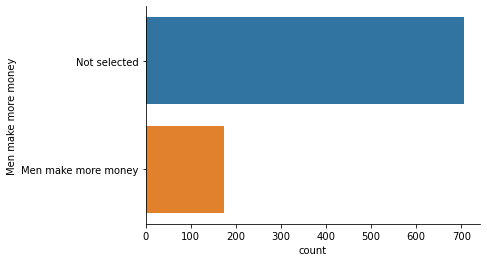

In [22]:
sns.countplot(y='Men make more money',data=Dataframe)
sns.despine()

ValueError: Could not interpret value `b` for parameter `y`

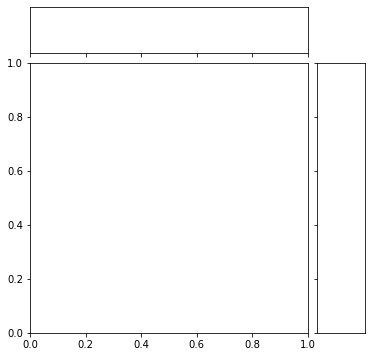

In [59]:
sns.jointplot(x='Importance of being seen as masculine', y='b', data=Dataframe, kind='reg')

In [58]:
b = Dataframe['Men make more money'].value_counts()

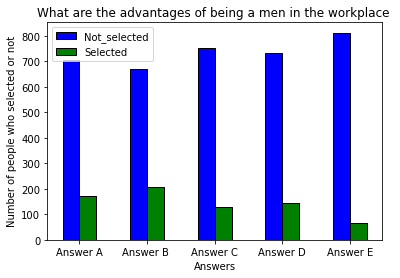

In [54]:
import numpy as np
import matplotlib.pyplot as plt
   
Notselected = [707, 672, 753, 734 , 813 ]
Selected = [173, 208, 127, 146, 67]
  
n=5
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, Notselected, color = 'b',
        width = width, edgecolor = 'black',
        label='Not_selected')

plt.bar(r + width, Selected, color = 'g',
        width = width, edgecolor = 'black',
        label='Selected')
  
plt.xlabel("Answers")
plt.ylabel("Number of people who selected or not")
plt.title("What are the advantages of being a men in the workplace ")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['Answer A','Answer B ','Answer C','Answer D','Answer E'])
plt.legend()
  
plt.show()

In [53]:
Dataframe['Men are explicitly praised more often'].value_counts()

Not selected                             813
Men are explicitly praised more often     67
Name: Men are explicitly praised more often, dtype: int64

Question 10 and 11 were questions with more than one possible anwser to select . Therefore q0010_0001 , q0010_0002 ... Q0010_0008 could or could not have been selected as answers . By renaming them , I have made it easier to see what was selected . I have also changed "Not selected " as "No" to understand if choice presented in column was the one selected . 

In [107]:
replacing_var = {"Not selected": "No" , "Men make more money" : "Yes" , "Men are taken more seriously" :"Yes" ,  "Men have more choice" :"Yes", "Men have more promotion/professional development opportunities" :"Yes", "Men have more promotion/professional development opportunities": "Yes", "Men are explicitly praised more often": "Yes" , "Men generally have more support from their managers" : "Yes"}
Dataframe = Dataframe.replace(replacing_var)
Dataframe

,Importance of being seen as masculine,Men make more money,Men are taken more seriously,Men have more choice,Men have more promotion/professional development opportunities,Men are explicitly praised more often,Men have more support from their managers,Other,None of the Above
2,2,No,No,No,No,No,No,None of the above,No
4,4,No,No,No,No,No,No,None of the above,No
5,3,No,No,No,No,No,No,No,Other (please specify)
6,2,No,No,No,No,No,No,None of the above,No
8,1,No,No,No,No,No,No,None of the above,No
...,...,...,...,...,...,...,...,...,...
1609,1,No,No,No,No,No,No,No,Other (please specify)
1610,1,Yes,Yes,Yes,Yes,Yes,Yes,No,No
1611,4,Yes,No,Yes,No,No,Yes,No,No
1612,3,Yes,Yes,No,Yes,No,No,No,No


#### By switching rows with columns and vice versa , using pandas.DataFrame.transpose , I believe I have made a bit easier to understand the variables I will be working with in  my data visualization

In [135]:
Dataframe_transposed = Dataframe.T
Dataframe_transposed

,2,4,5,6,8,9,10,13,16,17,...,1601,1602,1603,1607,1608,1609,1610,1611,1612,1613
Importance of being seen as masculine,2,4,3,2,1,3,3,4,2,2,...,4,3,2,3,2,1,1,4,3,3
Men make more money,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,Yes,Yes,Yes,No
Men are taken more seriously,No,No,No,No,No,Yes,No,Yes,No,No,...,No,No,No,No,No,No,Yes,No,Yes,No
Men have more choice,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,Yes,Yes,No,No
Men have more promotion/professional development opportunities,No,No,No,No,No,Yes,No,No,No,No,...,No,No,No,Yes,No,No,Yes,No,Yes,No
Men are explicitly praised more often,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,Yes,No,No,No
Men have more support from their managers,No,No,No,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,Yes,Yes,No,No
Other,None of the above,None of the above,No,None of the above,None of the above,No,None of the above,No,None of the above,None of the above,...,None of the above,None of the above,None of the above,No,None of the above,No,No,No,No,None of the above
None of the Above,No,No,Other (please specify),No,No,No,No,No,Other (please specify),No,...,No,No,No,No,No,Other (please specify),No,No,No,No


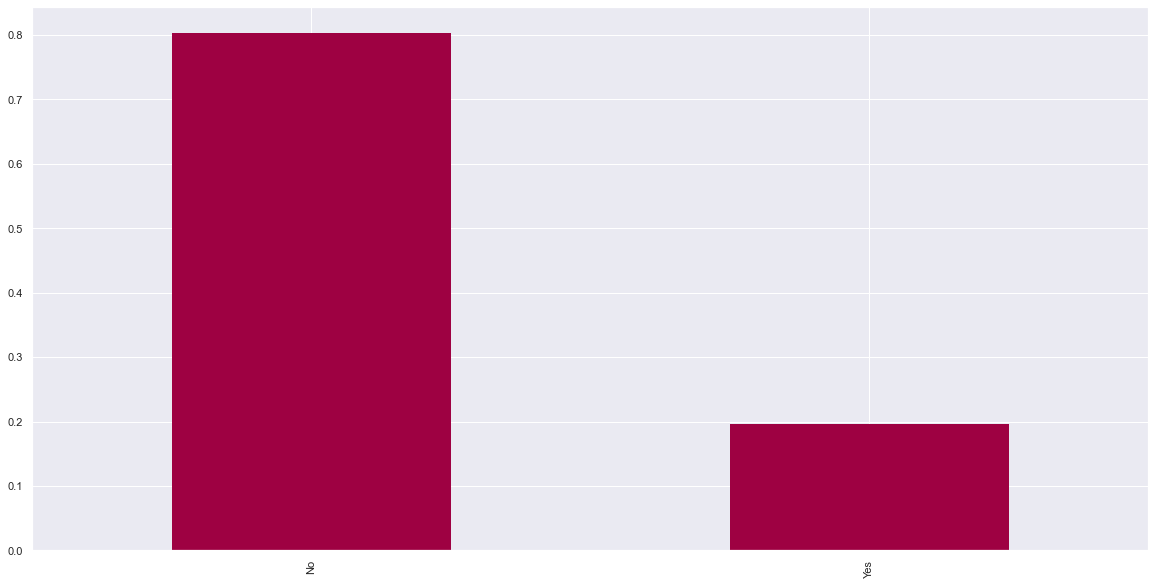

In [165]:
from matplotlib import cm
cmap=cm.get_cmap('Spectral')
c.plot(kind='bar',stacked='True',figsize=(20,10),cmap=cmap,edgecolor='None')
plt.show()

In [211]:
y = Dataframe.apply(lambda x: x.value_counts()).T.stack()
y

Importance of being seen as masculine                           0                                                                   3.0
                                                                1                                                                 123.0
                                                                2                                                                 292.0
                                                                3                                                                 356.0
                                                                4                                                                 106.0
Men make more money                                             Men make more money                                               173.0
                                                                Not selected                                                      707.0
Men are taken more seriously                    

In [209]:
Dataframe.groupby(["Men are taken more seriously"]).size().reset_index(name="count")


,Men are taken more seriously,count
0,Men are taken more seriously,208
1,Not selected,672


In [115]:
Dataframe.groupby(["Men have more choice"]).size().reset_index(name="Count")

,Men have more choice,Count
0,No,753
1,Yes,127


In [116]:
Dataframe.groupby(["Men have more promotion/professional development opportunities"]).size().reset_index(name="Count")

,Men have more promotion/professional development opportunities,Count
0,No,734
1,Yes,146


In [117]:
Dataframe.groupby(["Men are explicitly praised more often"]).size().reset_index(name="Count")

,Men are explicitly praised more often,Count
0,No,813
1,Yes,67


In [118]:
Dataframe.groupby(["Other"]).size().reset_index(name="Count")

,Other,Count
0,No,355
1,None of the above,525


In [119]:
Dataframe.groupby(["None of the Above"]).size().reset_index(name="Count")

,None of the Above,Count
0,No,819
1,Other (please specify),61


### Same steps for question 11
**Question 11** : In which of the following ways would you say it’s a ​disadvantage​ to be a man at your work right now?
 - q0011_0001 : Managers want to hire and promote women
 - q0011_0002 : Greater risk of being accused of sexual harassment
 - q0011_0003 : Greater risk of being accused of being sexist or racist
 - q0010_0002 : Other 
 - q0010_0003 : None of the above

In [120]:
Dataframe2 = df[['q0002','q0011_0001','q0011_0002','q0011_0003','q0011_0004','q0011_0005']] 
Dataframe2

,q0002,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005
0,Somewhat important,NaN,NaN,NaN,NaN,NaN
1,Somewhat important,NaN,NaN,NaN,NaN,NaN
2,Not too important,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected
3,Not too important,NaN,NaN,NaN,NaN,NaN
4,Very important,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
...,...,...,...,...,...,...
1610,Not at all important,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected
1611,Very important,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
1612,Somewhat important,Managers want to hire and promote women,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
1613,Somewhat important,Not selected,Not selected,Not selected,None of the above,Not selected


In [121]:
Dataframe2 = Dataframe2.dropna()
Dataframe2

,q0002,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005
2,Not too important,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected
4,Very important,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
5,Somewhat important,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected
6,Not too important,Not selected,Not selected,Not selected,None of the above,Not selected
8,Not at all important,Not selected,Not selected,Not selected,None of the above,Not selected
...,...,...,...,...,...,...
1609,Not at all important,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
1610,Not at all important,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected
1611,Very important,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
1612,Somewhat important,Managers want to hire and promote women,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected


In [122]:
Dataframe2 = Dataframe2.rename(columns={"q0002":"Importance of being seen as masculine"})
Dataframe2 = Dataframe2.select_dtypes(include=['object']).copy()
cleanup_nums = {"Importance of being seen as masculine" : {"Very important": 4, "Somewhat important":3 , "Not too important":2, "Not at all important":1}}
Dataframe2 = Dataframe2.replace(cleanup_nums)
Dataframe2.head()

,Importance of being seen as masculine,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005
2,2,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected
4,4,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
5,3,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected
6,2,Not selected,Not selected,Not selected,None of the above,Not selected
8,1,Not selected,Not selected,Not selected,None of the above,Not selected


In [123]:
Dataframe2 = Dataframe2.rename(columns={"q0011_0001": "Managers want to hire and promote women" , "q0011_0002": "Greater risk of being accused of sexual harassment" , "q0011_0003":"Greater risk of being accused of being sexist or racist" , "q0011_0004":"Other", "q0011_0005":"None of the above"})
Dataframe2

,Importance of being seen as masculine,Managers want to hire and promote women,Greater risk of being accused of sexual harassment,Greater risk of being accused of being sexist or racist,Other,None of the above
2,2,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected
4,4,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
5,3,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected
6,2,Not selected,Not selected,Not selected,None of the above,Not selected
8,1,Not selected,Not selected,Not selected,None of the above,Not selected
...,...,...,...,...,...,...
1609,1,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
1610,1,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected
1611,4,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
1612,3,Managers want to hire and promote women,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected


In [124]:
replacing_var = {"Not selected": "No" , "Managers want to hire and promote women" : "Yes" ,"Greater risk of being accused of sexual harassment": "Yes" , "Greater risk of being accused of being sexist or racist": "Yes"}
Dataframe2 = Dataframe2.replace(replacing_var)
Dataframe2

,Importance of being seen as masculine,Managers want to hire and promote women,Greater risk of being accused of sexual harassment,Greater risk of being accused of being sexist or racist,Other,None of the above
2,2,Yes,No,No,No,No
4,4,No,Yes,Yes,No,No
5,3,No,No,Yes,No,No
6,2,No,No,No,None of the above,No
8,1,No,No,No,None of the above,No
...,...,...,...,...,...,...
1609,1,No,Yes,Yes,No,No
1610,1,No,No,Yes,No,No
1611,4,No,Yes,Yes,No,No
1612,3,Yes,Yes,Yes,No,No


In [125]:
Dataframe2_transposed  = Dataframe2.T
Dataframe2_transposed 

,2,4,5,6,8,9,10,13,16,17,...,1601,1602,1603,1607,1608,1609,1610,1611,1612,1613
Importance of being seen as masculine,2,4,3,2,1,3,3,4,2,2,...,4,3,2,3,2,1,1,4,3,3
Managers want to hire and promote women,Yes,No,No,No,No,No,Yes,Yes,No,No,...,Yes,No,No,No,No,No,No,No,Yes,No
Greater risk of being accused of sexual harassment,No,Yes,No,No,No,Yes,Yes,No,Yes,No,...,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No
Greater risk of being accused of being sexist or racist,No,Yes,Yes,No,No,No,Yes,No,No,No,...,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No
Other,No,No,No,None of the above,None of the above,No,No,No,No,None of the above,...,No,None of the above,No,No,None of the above,No,No,No,No,None of the above
None of the above,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [142]:
Dataframe2.groupby(["Managers want to hire and promote women"]).size().reset_index(name="Count")

,Managers want to hire and promote women,Count
0,No,700
1,Yes,180


In [127]:
Dataframe2.groupby(["Greater risk of being accused of sexual harassment"]).size().reset_index(name="Count")

In [128]:
Dataframe2.groupby(["Greater risk of being accused of being sexist or racist"]).size().reset_index(name="Count")

In [129]:
Dataframe2.groupby(["None of the above"]).size().reset_index(name="Count")

## Task 3 : Method Chaining 

In [2]:
## For Question 10 
df1 = (
    pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv', usecols=['q0002','q0010_0001','q0010_0002','q0010_0003','q0010_0004','q0010_0005','q0010_0006','q0010_0007','q0010_0008'])
    .dropna()
    .rename(columns={"q0002": "Importance of being seen as masculine" , "q0010_0001": "Men make more money" , "q0010_0002": "Men are taken more seriously" , "q0010_0003": "Men have more choice","q0010_0004": "Men have more promotion/professional development opportunities","q0010_0005": "Men are explicitly praised more often", "q0010_0006":"Men have more support from their managers","q0010_0007":"Other" , "q0010_0008":"None of the Above"})
    .replace(cleanup_nums)
    .replace(replacing_var)
    .T
)
df1

NameError: name 'pd' is not defined

In [132]:
## For Question 11 
df2 = ( 
    pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv', usecols=['q0002','q0011_0001','q0011_0002','q0011_0003','q0011_0004','q0011_0005'])
    .dropna()
    .rename(columns={"q0002": "Importance of being seen as masculine" ,"q0011_0001": "Managers want to hire and promote women" , "q0011_0002": "Greater risk of being accused of sexual harassment" , "q0011_0003":"Greater risk of being accused of being sexist or racist" , "q0011_0004":"Other", "q0011_0005":"None of the above"})
    .replace(cleanup_nums)
    .replace(replacing_var)
    .T
)
df2

,2,4,5,6,8,9,10,13,16,17,...,1601,1602,1603,1607,1608,1609,1610,1611,1612,1613
Importance of being seen as masculine,2,4,3,2,1,3,3,4,2,2,...,4,3,2,3,2,1,1,4,3,3
Managers want to hire and promote women,Yes,No,No,No,No,No,Yes,Yes,No,No,...,Yes,No,No,No,No,No,No,No,Yes,No
Greater risk of being accused of sexual harassment,No,Yes,No,No,No,Yes,Yes,No,Yes,No,...,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No
Greater risk of being accused of being sexist or racist,No,Yes,Yes,No,No,No,Yes,No,No,No,...,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No
Other,No,No,No,None of the above,None of the above,No,No,No,No,None of the above,...,No,None of the above,No,No,None of the above,No,No,No,No,None of the above
None of the above,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [134]:
def load_and_process("https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv"):
    # Method Chain 1 (Cleaning and rearranging answers from Question 10 )
    df1 ( 
    pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv', usecols=['q0002','q0010_0001','q0010_0002','q0010_0003','q0010_0004','q0010_0005','q0010_0006','q0010_0007','q0010_0008'])
    .dropna()
    .rename(columns={"q0002": "Importance of being seen as masculine" , "q0010_0001": "Men make more money" , "q0010_0002": "Men are taken more seriously" , "q0010_0003": "Men have more choice","q0010_0004": "Men have more promotion/professional development opportunities","q0010_0005": "Men are explicitly praised more often", "q0010_0006":"Men have more support from their managers","q0010_0007":"Other" , "q0010_0008":"None of the Above"})
    .replace(cleanup_nums)
    .replace(replacing_var)
    .T
)
df1

    # Method Chain 2 (Create new columns, drop others, and do processing)

    DF1 = (
          df1
           .replace(cleanup_nums)
           .replace(replacing_var).
      )

    # Make sure to return the latest dataframe
    
    return DF1


SyntaxError: invalid syntax (884900574.py, line 1)

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

# Some code to style plots

import matplotlib.pyplot as plt
import seaborn as sns